In [3]:
# General:
#import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

import time
#from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import nltk
import re

In [5]:
file = input("MASUKAN NAMA FILE ")

MASUKAN NAMA FILE record_fix.csv


In [6]:
import csv


# tentukan lokasi file, nama file, dan inisialisasi csv
f = open(file, 'r')
reader = csv.reader(f)

# membaca baris per baris
for row in reader:
	print (row)

# menutup file csv
f.close()
print("DAFTAR TWEETS YANG TELAH DIAMBIL")

["2018-12-06 03:48:50,b'Giat bapak Kapolda NTB di Sat Brimob Polda NTB sebagai narasumber pada latihan pemantapan nilai -nilai wawasan keba\\xe2\\x80\\xa6 https://t.co/NsKHpAZAyK';"]
['2018-12-06 03:48:08,"b\'RT @mdariusdah: Selamat Pagi Pak @DivHumas_Polri ...\\nTolong jangan berat sebelah jika bertindak...\\nBerlakulah  yg Adil, maka Penduduk Indon\\xe2\\x80\\xa6\'";']
['2018-12-06 03:48:03,"b\'RT @MusfarB: Alhamdulilah brkat bntuan Rekan2,bwa mrka br2 sdh plg krmh msing2,sy mngucapkan byk2 trimakasih kpda yg trlibat utk kplgn mrka\\xe2\\x80\\xa6\'";']
["2018-12-06 03:47:16,b'@Airin_NZ @DivHumas_Polri karena mereka takut ama kelompok mereka(zonk and the geng)';"]
["2018-12-06 03:47:00,b'@maspiyuuu Pakde yg ada di @DivHumas_Polri baca noh! Ga malu apa orang salah di biarin kabur ? Org ga salah malah d\\xe2\\x80\\xa6 https://t.co/WJfwv9hwdJ';"]
["2018-12-06 03:46:29,b'Pembantaian Papua adalah Terorisme\\n\\n@jokowi @prabowo @BIN_Official @PolhukamRI @wiranto1947 @Kemhan_RI @ryamizard_r

In [7]:
#initialize stopWords
stopWords = []

#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

In [8]:
#start getStopWordList
def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('AT_USER')
    stopWords.append('URL')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords
#end

In [9]:
#import regex
import re
#start process_tweet
def processTweet(tweet):
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet
#end

#start getfeatureVector
def getFeatureVector(tweet):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences
        w = replaceTwoOrMore(w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word stats with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        #ignore if it is a stop word
        if(w in stopWords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector
#end

In [10]:
#Read the tweets one by one and process it
fp = open('data/testSentimen.csv', 'r')
line = fp.readline()

st = open('data/feature_list/stopwordsID.txt', 'r')
stopWords = getStopWordList('data/feature_list/stopwordsID.txt')

while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
    print (featureVector)
    line = fp.readline()
#end loop
fp.close()
print()
print("DAFTAR STOPWORD")
print()

['hai', 'cici', 'memberitaukan', 'cinta', 'berkunjung', 'secepatnya', 'fantasi', 'berkendari']
['mendengar', 'kontes', 'selamat']
['pemenang', 'franklin', 'i']
['hoax', 'kebencian', 'mengancam', 'persatuan', 'janban']
['polri', 'reuni', 'berjalan', 'polrihumanis']
['ditindak', 'sampe']
['mantap', 'wakapolsek', 'minahasa', 'utara', 'kauditan', 'ipda', 'l', 'hadi', 'purwanto', 'semangat', 'kepolisian', 'menyelamatkan', 'anak', 'bangsa']
['hoax', 'kebencian', 'mengancam', 'persatuan', 'janban']
['pa', 'kapolri', 'pa', 'kapolri', 'ngitungnya', 'pas', 'ashar', 'jm']
['hoax', 'kebencian', 'mengancam', 'persatuan', 'janban']
['lanjutkan', 'biar', 'efek']
['ayuk', 'pakai', 'helm', 'dkijakarta', 'jaktim', 'safetyfirst']
['pati', 'polri', 'dukung', 'salah', 'paslon', 'pilpres', 'via']
['kediri', 'kota', 'menghimbau', 'menjaga', 'kerukunan', 'mudah', 'terprovokasi', 'hindari', 'menyebarkan']
['sa', 'bangga', 'anak', 'polrihumanis', 'thinkbeforeposting']
['keakraban', 'bhabinkamtibmas', 'muh', 'yu

['innalillahi', 'wainna', 'ilaihi', 'mohon', 'penegak', 'hukum', 'membetantas']
['gk', 'kerjaan', 'hrus']
['bantu', 'kafir', 'jd', 'membunuh', 'dibaik2in', 'hny', 'berlku', 'utk', 'umat']
['polri', 'reuni', 'berjalan', 'polrihumanis']
['ngarang', 'hitung']
['berkat', 'kebaikan']
['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom']
['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom']
['hak', 'warga', 'negara', 'mengibarkan', 'bendera', 'merah', 'putih', 'plus', 'kepengen', 'lepas']
['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom']
['polri', 'reuni', 'berjalan', 'polrihumanis']
['kejadiannya', 'menjelang', 'malam']
['polri', 'jaga', 'persatuan', 'kesatuan', 'jenderal', 'polisi', 'prof', 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['memandang']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['kenal']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['belas']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['pandang']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['bertanggung']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['masuk']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [11]:
import array as arr
import csv

#Read the tweets one by one and process it
inpTweets = csv.reader(open('data/testSentimen.csv', 'r'), delimiter=',', quotechar='|')
tweets = []
featureList = []
for row in inpTweets:
    sentiment = row[0]
    tweet = row[1]
    processedTweet = processTweet(tweet)
    featureVector = getFeatureVector(processedTweet)
    tweets.append((featureVector, sentiment))
    featureList = featureList + featureVector
#end loop
print("FEATURE LIST")
print()
print (tweets)
print (featureList)


FEATURE LIST

[(['hai', 'cici', 'memberitaukan', 'cinta', 'berkunjung', 'secepatnya', 'fantasi', 'berkendari'], 'positive'), (['mendengar', 'kontes', 'selamat'], 'positive'), (['pemenang', 'franklin', 'i'], 'positive'), (['hoax', 'kebencian', 'mengancam', 'persatuan', 'janban'], 'positive'), (['polri', 'reuni', 'berjalan', 'polrihumanis'], 'positive'), (['ditindak'], 'positive'), (['mantap', 'wakapolsek', 'minahasa', 'utara'], 'positive'), (['hoax', 'kebencian', 'mengancam', 'persatuan', 'janban'], 'positive'), (['pa', 'kapolri'], 'positive'), (['hoax', 'kebencian', 'mengancam', 'persatuan', 'janban'], 'positive'), (['lanjutkan'], 'positive'), (['ayuk'], 'positive'), (['pati', 'polri', 'dukung', 'salah', 'paslon', 'pilpres', 'via'], 'positive'), (['kediri', 'kota', 'menghimbau', 'menjaga', 'kerukunan'], 'positive'), (['sa', 'bangga', 'anak', 'polrihumanis', 'thinkbeforeposting'], 'positive'), (['keakraban', 'bhabinkamtibmas', 'losari'], 'positive'), (['rt', 'hoax', 'kebencian', 'mengan

In [8]:
#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

ini = processTweet('baru saja donor darah, tangan saya masih sakit')
ini2 = getFeatureVector(ini)
ini3 = extract_features(ini2)
print (ini3)
pos = 0
neg = 0
neu = 0

{'contains(hai)': False, 'contains(cici)': False, 'contains(memberitaukan)': False, 'contains(cinta)': False, 'contains(berkunjung)': False, 'contains(secepatnya)': False, 'contains(fantasi)': False, 'contains(berkendari)': False, 'contains(mendengar)': False, 'contains(kontes)': False, 'contains(selamat)': False, 'contains(pemenang)': False, 'contains(franklin)': False, 'contains(i)': False, 'contains(hoax)': False, 'contains(kebencian)': False, 'contains(mengancam)': False, 'contains(persatuan)': False, 'contains(janban)': False, 'contains(polri)': False, 'contains(reuni)': False, 'contains(berjalan)': False, 'contains(polrihumanis)': False, 'contains(ditindak)': False, 'contains(mantap)': False, 'contains(wakapolsek)': False, 'contains(minahasa)': False, 'contains(utara)': False, 'contains(pa)': False, 'contains(kapolri)': False, 'contains(lanjutkan)': False, 'contains(ayuk)': False, 'contains(pati)': False, 'contains(dukung)': False, 'contains(salah)': False, 'contains(paslon)': Fa

In [9]:
#Read the tweets one by one and process it
fp = open('record_fix.csv', 'r')
line = fp.readline()

st = open('data/feature_list/stopwordsID.txt', 'r')
stopWords = getStopWordList('data/feature_list/stopwordsID.txt')

#end loop
#fp.close()
import nltk.classify
# Remove featureList duplicates
featureList = list(set(featureList))

# Generate the training set
training_set = nltk.classify.util.apply_features(extract_features, tweets)

# Train the Naive Bayes classifier
NBClassifier = nltk.NaiveBayesClassifier.train(training_set)

# Test the classifier
#testTweet = 'baru saja donor darah, tangan saya masih sakit'
testTweet = 'ujaran'
processedTestTweet = processTweet(testTweet)
sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
print ("testTweet = %s, sentiment = %s\n" % (testTweet, sentiment))
x = 0
sentimen=[]
while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
#    #print (featureVector)
    line = fp.readline()
    testTweet = processedTweet
    processedTestTweet = processTweet(testTweet)
    sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
    sentimen.append(sentiment)
    print ("testTweet = %s, sentiment = %s\n" % (featureVector, sentiment))
    
    myData=featureVector
    x = x + 1
    if sentiment == 'positive':
        pos = 1 + pos
    elif sentiment == 'negative':
        neg = 1 + neg
    elif sentiment == 'neutral':
        neu = 1 + neu
        
print(x)
print()
print("ANALISIS SENTIMEN")
print()

testTweet = ujaran, sentiment = negative

testTweet = ['kapolda', 'ntb', 'sat', 'brimob', 'polda', 'ntb', 'narasumber', 'latihan', 'pemantapan', 'nilai', 'wawasan'], sentiment = neutral

testTweet = ['selamat', 'pagi', 'berat', 'sebelah', 'adil', 'penduduk'], sentiment = positive

testTweet = ['alhamdulilah', 'brkat', 'bntuan', 'mrka', 'br2', 'sdh', 'plg', 'krmh', 'mngucapkan', 'byk2', 'trimakasih', 'kpda', 'trlibat', 'utk', 'kplgn'], sentiment = positive

testTweet = ['takut', 'ama', 'kelompok', 'and', 'the'], sentiment = negative

testTweet = ['pakde', 'baca', 'ga', 'malu', 'orang', 'salah', 'biarin', 'kabur', 'org', 'ga', 'salah'], sentiment = negative

testTweet = ['papua'], sentiment = negative

testTweet = ['bani', 'kampret', 'ajar', 'penghinaan', 'viralkan', 'biar', 'pelakunya', 'cyduk', 'ga', 'pake'], sentiment = negative

testTweet = ['maksud', 'orang', 'kalo', 'perang', 'bilang', 'aja', 'astaga', 'kibarkan', 'bendera', 'tauhid', 'perang', 'viralkan', 'orang'], sentiment = neg

testTweet = ['masya', 'allah', 'jam', 'minggu', 'pagi', 'buta', 'tiba2', 'sekelompok', 'orang', 'buta', 'berjalan', 'berbaris', 'mengikuti'], sentiment = positive

testTweet = ['pemuda', 'milenial', 'anti', 'wujudkan', 'pileg', 'pilpres', 'aman', 'damai'], sentiment = positive

testTweet = ['personel', 'satbrimob', 'polda', 'jatim', 'bko', 'polda', 'amole'], sentiment = neutral

testTweet = ['silakan', 'konfirmasi', 'maksud', 'boomm', 'cuitan'], sentiment = negative

testTweet = ['dencus', 'kemana', 'min'], sentiment = positive

testTweet = ['min', 'sia', 'siakan', 'potensi', 'anak', 'bangsa', 'pliiss'], sentiment = positive

testTweet = ['warga', 'negara', 'pencari', 'cacing', 'tangkap', 'masuk', 'kawasan', 'hutan', 'nambang', 'hutan', 'lindung'], sentiment = negative

testTweet = ['membawa', 'stnk', 'sdh', 'tilang', 'denda'], sentiment = negative

testTweet = ['segeralah', 'lakukan', 'toleransi', 'tuk', 'pelaku', 'provokasi', 'disintegrasi', 'bangsa'], sentiment = negative

testTweet

testTweet = ['bani', 'kampret', 'ajar', 'penghinaan', 'viralkan', 'biar', 'pelakunya', 'cyduk', 'ga', 'pake'], sentiment = negative

testTweet = ['warga', 'turki', 'dibohongi', 'la', 'kalo', 'hidupmu'], sentiment = negative

testTweet = ['dukung', 'doakan', 'dlm', 'mengejar', 'memberantas', 'kksb', 'papua', 'semoga'], sentiment = positive

testTweet = ['mohon', 'ditindak', 'lanjuti', 'akun', 'melecehkan', 'ulama', 'umat'], sentiment = negative

testTweet = ['waton', 'tohh', 'le'], sentiment = negative

testTweet = ['lha', 'iya', 'kapolsek', 'coba', 'sebutin', 'nama', 'daerahnya'], sentiment = neutral

testTweet = ['pengajian', 'memperkusi', 'ulama', 'tuduhan', 'radikal'], sentiment = negative

testTweet = ['hapus', 'tweetnya', 'tuduhan'], sentiment = negative

testTweet = ['mobil', 'sim', 'keliling', 'bagusnya', 'nggak', 'pakai', 'sirine', 'jl', 'daan'], sentiment = neutral

testTweet = ['hadiri', 'separo', 'reuni', 'kamera', 'video', 'putih'], sentiment = neutral

testTweet = ['mobil'

testTweet = ['spanduk', 'disamping', 'bermuatan', 'melecehkan', 'presiden'], sentiment = negative

testTweet = ['iya', 'gt', 'klo', 'otaknya', 'kebalik', 'jd'], sentiment = negative

testTweet = ['iya', 'brani', 'sebutkan', 'bro', 'cuman'], sentiment = negative

testTweet = ['masya', 'allah', 'jam', 'minggu', 'pagi', 'buta', 'tiba2', 'sekelompok', 'orang', 'buta', 'berjalan', 'berbaris', 'mengikuti'], sentiment = positive

testTweet = ['hukum', 'industri'], sentiment = negative

testTweet = ['maaf', 'kapolsek', 'ya', 'tolong', 'sebutkan', 'namanya'], sentiment = negative

testTweet = ['tips', 'aman', 'berkendara', 'hujan', 'via', 'elshintaedisimalam'], sentiment = positive

testTweet = ['nama', 'warga', 'sipil', 'dievakuasi', 'tim', 'gabungan', 'nduga', 'polrihumanis'], sentiment = neutral

testTweet = ['masya', 'allah', 'jam', 'minggu', 'pagi', 'buta', 'tiba2', 'sekelompok', 'orang', 'buta', 'berjalan', 'berbaris', 'mengikuti'], sentiment = positive

testTweet = ['twitter', 'please', 

testTweet = ['twitter', 'please', 'do', 'your', 'bapaknya', 'temen', 'dibawa', 'kabur', 'orang', 'lamar', 'kerjaan', 'usahanya'], sentiment = negative

testTweet = ['kau', 'salahkan', 'tni', 'krn', 'uu', 'gk', 'tni', 'terlibat', 'pemerintah', 'menyebut', 'pelaku', 'pembantaian'], sentiment = negative

testTweet = ['twitter', 'please', 'do', 'your', 'bapaknya', 'temen', 'dibawa', 'kabur', 'orang', 'lamar', 'kerjaan', 'usahanya'], sentiment = negative

testTweet = ['maaf', 'kapolsek', 'ya', 'tolong', 'sebutkan', 'namanya'], sentiment = negative

testTweet = ['dencus', 'kemana', 'min'], sentiment = positive

testTweet = ['nahdhatul', 'ulama', 'menerus', 'fitnah', 'nkri', 'rapuh', 'nahdhatul', 'ulama', 'salah'], sentiment = negative

testTweet = ['pda', 'entar', 'kena', 'demo', 'mending'], sentiment = negative

testTweet = ['biadab', 'pas', 'pasan', 'beraninya', 'menghina', 'mengejek', 'memfitnah', 'presiden', 'mohon', 'jari'], sentiment = negative

testTweet = ['twitter', 'please', 'do', 

testTweet = ['biarkan', 'biar', 'membungkam', 'mulut', 'allah'], sentiment = negative

testTweet = ['allah', 'maha'], sentiment = positive

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], sentiment = negative

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], sentiment = positive

testTweet = ['data', 'rb', 'sekelas', 'polri', 'berani', 'mainin', 'data'], sentiment = negative

testTweet = ['takut', 'kedengeran'], sentiment = negative

testTweet = ['cuman'], sentiment = negative

testTweet = ['update', 'info', 'progress', 'laporan', 'hoax', 'oposisi'], sentiment = neutral

testTweet = ['lanjutkan', 'biar', 'efek'], sentiment = negative

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], sentiment = negative

testTweet = ['terdeteksi', 'namanya', 

testTweet = ['tanggal', 'desember', 'wib', 'napi', 'kabur', 'lp', 'kelas', 'ii', 'a', 'orang'], sentiment = negative

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], sentiment = negative

testTweet = ['mohon', 'maklum', 'maksudnya', 'juta', 'peserta', 'bilang', 'ribu', 'peserta'], sentiment = neutral

testTweet = ['tolong', 'usut', 'penyebar'], sentiment = negative

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], sentiment = positive

testTweet = ['mubahalah', 'buni', 'yani', 'tolong', 'sebarkan', 'rakyat', 'indonesia', 'sampe', 'buzzer'], sentiment = neutral

testTweet = ['polri'], sentiment = positive

testTweet = ['tanggal', 'desember', 'wib', 'napi', 'kabur', 'lp', 'kelas', 'ii', 'a', 'orang'], sentiment = negative

testTweet = ['nih', 'orang', 'eh', 'moto'], sentiment = negative

testTweet = ['masuk', 'kategori', 'hoax', 'kagak', 'nih', 'menghimbau', '

testTweet = ['gimana', 'sih', 'pengamanan', 'rb', 'peserta', 'rb', 'ahh', 'tau'], sentiment = negative

testTweet = ['tunggu', 'paham', 'juta', 'aparat', 'keamanan', 'smua', 'yah', 'min', 'oh'], sentiment = positive

testTweet = ['reuni', 'dihadiri', 'panglima', 'apel', 'siaga', 'kerahkan'], sentiment = negative

testTweet = ['pgen', 'ktwa', 'takut', 'mengamnkan', 'brapa'], sentiment = negative

testTweet = ['iya', 'iya', 'iya', 'peserta', 'gabungan', 'diturunkan'], sentiment = negative

testTweet = ['pol', 'kta', 'ya', 'pake', 'data', 'klo', 'ngomong', 'ga', 'hitung'], sentiment = negative

testTweet = ['marak', 'pencurian', 'sapi', 'kapolres', 'lumajang', 'ambil', 'sikap'], sentiment = negative

testTweet = ['gentar', 'pol', 'rakyat', 'mendukung', 'bahar', 'kandang'], sentiment = positive

testTweet = ['cuitan', 'dasar', 'dijadikan', 'dasar', 'pemeriksaan'], sentiment = negative

testTweet = ['acara', 'reuni', 'kampanye', 'agama', 'otak', 'diisi', 'dg', 'kotoran'], sentiment = negati

In [11]:
print('Jumlah Sentiment Positive : ')
print(pos)
print('Jumlah Sentiment Negative : ')
print(neg)
print('Jumlah Sentiment Neutral :')
print(neu)

Jumlah Sentiment Positive : 
181
Jumlah Sentiment Negative : 
322
Jumlah Sentiment Neutral :
33


In [12]:
#Read the tweets one by one and process it
fp = open('data/testtopik.csv', 'r')
line = fp.readline()

st = open('data/feature_list/stopwordsID.txt', 'r')
stopWords = getStopWordList('data/feature_list/stopwordsID.txt')

while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
    print (featureVector)
    line = fp.readline()
#end loop
fp.close()

['jenazah', 'pilot', 'lion', 'air', 'jt610', 'berhasil', 'polrihumanis', 'thinkbeforeposting']
['bayar', 'pajak', 'tahunan', 'polisi', 'berwenang', 'tilang', 'sita', 'kendaraan']
['jenazah', 'korban', 'lio', 'air', 'jt610', 'identitas', 'jenazah', 'lion', 'air', 'jt610', 'teridentifikasi']
['bayar', 'kaya', 'tertera', 'stnk']
['merepotkan', 'aparatlebih', 'kepolisian', 'kegiatan']
['ya', 'team', 'maling', 'mengembalikan']
[]
['maling', 'ayam', 'mengembalikan', 'ayam', 'dihentikan', 'proses', 'hukumnya']
['tolong', 'viral', 'akun', 'rela', 'bui', 'memenggal', 'leher']
['share', 'detail', 'oknum', 'dilacak']
['bayar', 'pajak', 'tahunan', 'polisi', 'berwenang', 'tilang', 'sita', 'kendaraan']
['maaf', 'komndan', 'bukn', 'juta']
['cuman', 'orang', 'ko', 'hadir', 'tambah2in']
['peserta', 'tni', 'polri', 'gak']
['yaelah', 'besaran', 'konser', 'kpop', 'papan', 'konser', 'sampe']
['pakai', 'ilmu', 'statistika', 'terapan', 'dikit', 'bejibun']
['tau', 'gak', 'metode', 'teknik', 'penghitungan', 'o

['bom', 'mobil', 'irish', 'orang', 'australia', 'minum', 'rockstars', 'kepala']
['terluka', 'tangan', 'ku']
['gk', 'ngeles', 'kenyataannya']
['menghina', 'prabowo', 'asu', 'dianggap']
['macan', 'aja', 'tuhannya', 'diajak', 'negosiasi', 'taurat', 'imam', 'farisi']
['coba', 'hub', 'barangkali', 'butuh', 'sewa', 'ngadepin']
[]
['namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom']
['astaghfirlloh', 'orang', 'dibayar']
['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom']
['bener', 'kalo', 'kemaren', 'jutaan', 'puluhan', 'ribu']
['iyain', 'aja', 'drpd']
['sebar', 'viral', 'bilang', 'jamaah', 'reuni', 'uang', 'saku', 'ribu', 'bener']
['gerombolan', 'suka', 'bikin']
['bae', 'hukum', 'adil', 'bayar']
['hoax']
['macan', 'aja', 'tuhannya', 'diajak', 'negosiasi', 'taurat', 'imam', 'farisi']
['kayaknya', 'pesimis',

[]
[]
[]
[]
[]
[]
[]
['sobat']
['sejarah', 'lampu']
[]
[]
['hadiri', 'reuni', 'akpol']
[]
[]
['siang', 'sobat']
[]
[]
['sobat']
[]
[]
[]
[]
['jaya', 'wijaya', 'serahkan', 'jenazah', 'korban', 'kekejaman']
[]
[]
['evakuasi', 'korban', 'kekejaman']
['terjal', 'penghalang', 'melaksanakan', 'tugas']
['bangun', 'zona', 'integritas', 'kapolri', 'raih', 'penghargaan', 'wapres']
['menjaga', 'perairan']
[]
[]
['terbaik']
[]
['thinkbeforeposting']
['pemasangan', 'lampu', 'penunjuk', 'arah', 'sepeda']
[]
[]
[]
[]
['thinkbeforeposting']
['tegaskan', 'keberadaan', 'nduga', 'rangka', 'penegakan']
[]
['penmas', 'dirjen', 'dukcapil', 'kepmendagri', 'gelar', 'press', 'conference', 'penemuan']
['tanggap', 'menolong']
[]
[]
['tegaskan', 'keberadaan', 'nduga', 'rangka', 'penegakan']
[]
['sobat']
['berbagi', 'tips', 'aman', 'berkendara', 'musim']
[]
['lamsel', 'gagalkan', 'penyelundupan', 'kg']
[]
['thinkbeforeposting']
['sore', 'sobat']
[]
[]
[]
['sosialisasi', 'bahaya', 'hoax', 'siswa', 'sman', 'ppu']
[]

In [13]:
import array as arr
import csv

#Read the tweets one by one and process it
inpTweets = csv.reader(open('data/testtopik.csv', 'r'), delimiter=',', quotechar='|')
tweets = []
featureList = []
for row in inpTweets:
    sentiment = row[0]
    tweet = row[1]
    processedTweet = processTweet(tweet)
    featureVector = getFeatureVector(processedTweet)
    tweets.append((featureVector, sentiment))
    featureList = featureList + featureVector
#end loop
print (tweets)
print (featureList)

[(['jenazah', 'pilot', 'lion', 'air', 'jt610', 'berhasil', 'polrihumanis', 'thinkbeforeposting'], 'KegiatanPolisi'), (['bayar', 'pajak', 'tahunan', 'polisi', 'berwenang', 'tilang', 'sita', 'kendaraan'], 'KegiatanPolisi'), (['jenazah', 'korban', 'lio', 'air', 'jt610', 'identitas', 'jenazah', 'lion', 'air', 'jt610', 'teridentifikasi'], 'KegiatanPolisi'), (['bayar', 'kaya', 'tertera', 'stnk', 'tuh'], 'KomentarMasyarakat'), (['sblum', 'merepotkan', 'aparatlebih', 'kepolisian', 'kegiatan'], 'KomentarMasyarakat'), (['ya', 'team', 'maling', 'mengembalikan'], 'KomentarMasyarakat'), (['hoax', 'laporan'], 'KegiatanPolisi'), (['maling', 'ayam', 'mengembalikan', 'ayam', 'dihentikan', 'proses', 'hukumnya', 'serius'], 'KomentarMasyarakat'), (['tolong', 'viral', 'akun', 'rela', 'bui', 'memenggal', 'leher'], 'KomentarMasyarakat'), (['share', 'detail', 'oknum', 'dilacak'], 'KomentarMasyarakat'), (['bayar', 'pajak', 'tahunan', 'polisi', 'berwenang', 'tilang', 'sita', 'kendaraan'], 'KegiatanPolisi'), (['

In [14]:
#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

ini = processTweet('baru saja donor darah, tangan saya masih sakit')
ini2 = getFeatureVector(ini)
ini3 = extract_features(ini2)
print (ini3)
komentar = 0
layanan = 0
giat = 0
komentarpos = 0
komentarneg = 0
komentarneu = 0

layananpos = 0
layananneg = 0
layananneu = 0

giatpos = 0
giatneg = 0
giatneu = 0


{'contains(jenazah)': False, 'contains(pilot)': False, 'contains(lion)': False, 'contains(air)': False, 'contains(jt610)': False, 'contains(berhasil)': False, 'contains(polrihumanis)': False, 'contains(thinkbeforeposting)': False, 'contains(bayar)': False, 'contains(pajak)': False, 'contains(tahunan)': False, 'contains(polisi)': False, 'contains(berwenang)': False, 'contains(tilang)': False, 'contains(sita)': False, 'contains(kendaraan)': False, 'contains(korban)': False, 'contains(lio)': False, 'contains(identitas)': False, 'contains(teridentifikasi)': False, 'contains(kaya)': False, 'contains(tertera)': False, 'contains(stnk)': False, 'contains(tuh)': False, 'contains(sblum)': False, 'contains(merepotkan)': False, 'contains(aparatlebih)': False, 'contains(kepolisian)': False, 'contains(kegiatan)': False, 'contains(ya)': False, 'contains(team)': False, 'contains(maling)': False, 'contains(mengembalikan)': False, 'contains(hoax)': False, 'contains(laporan)': False, 'contains(ayam)': Fa

In [15]:
#Read the tweets one by one and process it
fp = open('record_fix.csv', 'r')
line = fp.readline()

st = open('data/feature_list/stopwordsID.txt', 'r')
stopWords = getStopWordList('data/feature_list/stopwordsID.txt')

#end loop
#fp.close()
import nltk.classify
# Remove featureList duplicates
featureList = list(set(featureList))

# Generate the training set
training_set = nltk.classify.util.apply_features(extract_features, tweets)

# Train the Naive Bayes classifier
NBClassifier = nltk.NaiveBayesClassifier.train(training_set)

# Test the classifier
#testTweet = 'baru saja donor darah, tangan saya masih sakit'
testTweet = 'ujaran'
processedTestTweet = processTweet(testTweet)
sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
print ("testTweet = %s, sentiment = %s\n" % (testTweet, sentiment))
x = 0
topik=[]
while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
#    #print (featureVector)
    line = fp.readline()
    testTweet = processedTweet
    processedTestTweet = processTweet(testTweet)
    sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
    topik.append(sentiment)
    print ("testTweet = %s, topik = %s, sentimen = %s\n" % (featureVector, sentiment,sentimen[x]))
    #print(sentimen[x])
    myData=featureVector
    x = x + 1
    if sentiment == 'KegiatanPolisi':
        giat = 1 + giat
    elif sentiment == 'LayananMasyarakat':
        layanan = 1 + layanan
    elif sentiment == 'KomentarMasyarakat':
        komentar = 1 + komentar
    
    
        
print()
print("KLASIFIKASI TOPIK")
print()
print(x)


testTweet = ujaran, sentiment = KegiatanPolisi

testTweet = ['kapolda', 'ntb', 'sat', 'brimob', 'polda', 'ntb', 'narasumber', 'latihan', 'pemantapan', 'nilai', 'wawasan'], topik = KegiatanPolisi, sentimen = neutral

testTweet = ['selamat', 'pagi', 'berat', 'sebelah', 'adil', 'penduduk'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['alhamdulilah', 'brkat', 'bntuan', 'mrka', 'br2', 'sdh', 'plg', 'krmh', 'mngucapkan', 'byk2', 'trimakasih', 'kpda', 'trlibat', 'utk', 'kplgn'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['takut', 'ama', 'kelompok', 'and', 'the'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['pakde', 'baca', 'ga', 'malu', 'orang', 'salah', 'biarin', 'kabur', 'org', 'ga', 'salah'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['papua'], topik = KegiatanPolisi, sentimen = negative

testTweet = ['bani', 'kampret', 'ajar', 'penghinaan', 'viralkan', 'biar', 'pelakunya', 'cyduk', 'ga', 'pake'], topik = KomentarMas

testTweet = ['mhn', 'bntuan', 'nya', 'ank', 'prgi', 'tdk', 'dketahau', 'olh', 'ortu', 'dlm', 'chat'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['penistaan'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['nih', 'rekam', 'jejekanya', 'sila', 'disimak', 'menghina', 'polisi'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['mudah', 'percaya', 'kebenarannya', 'yaa', 'sobat', 'smart', 'netizen', 'biasakan'], topik = LayananMasyarakat, sentimen = positive

testTweet = ['mudah', 'percaya', 'kebenarannya', 'yaa', 'sobat', 'smart', 'netizen', 'biasakan'], topik = LayananMasyarakat, sentimen = positive

testTweet = ['mudah', 'percaya', 'kebenarannya', 'yaa', 'sobat', 'smart', 'netizen', 'biasakan'], topik = LayananMasyarakat, sentimen = positive

testTweet = ['orang', 'berulang', 'kali', 'berulang', 'kali', 'maaf', 'lapor', 'tolong', 'tegakkan'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['evakuasi', 'jenazah', 'jg', 'ditembak

testTweet = ['mudah', 'percaya', 'kebenarannya', 'yaa', 'sobat', 'smart', 'netizen', 'biasakan'], topik = LayananMasyarakat, sentimen = positive

testTweet = ['kapolri', 'tito', 'karnavian', 'mohon', 'polisi', 'pemberani', 'apresiasi', 'setinggi2nya', 'keberaniannya', 'membela'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['min', 'sia', 'siakan', 'potensi', 'anak', 'bangsa', 'pliiss'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['fic', 'full', 'nya'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['pemuda', 'milenial', 'anti', 'wujudkan', 'pileg', 'pilpres', 'aman', 'damai'], topik = LayananMasyarakat, sentimen = positive

testTweet = ['kepala', 'divisi', 'humas', 'polri', 'beserta', 'staf', 'bhayangkari', 'selamat', 'ulang', 'ketua', 'bhayangkari'], topik = KegiatanPolisi, sentimen = neutral

testTweet = ['terkadang', 'bingung', 'ahok', 'ratna', 'sarumpaet', 'buni'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['twitter',

testTweet = ['twitter', 'please', 'do', 'your', 'bapaknya', 'temen', 'dibawa', 'kabur', 'orang', 'lamar', 'kerjaan', 'usahanya'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['twitter', 'please', 'do', 'your', 'bapaknya', 'temen', 'dibawa', 'kabur', 'orang', 'lamar', 'kerjaan', 'usahanya'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['ya', 'allah', 'merinding', 'lihat', 'video', 'ikutan', 'nyanyi', 'nangis', 'radikal', 'banget'], topik = KomentarMasyarakat, sentimen = neutral

testTweet = ['biadab', 'pas', 'pasan', 'beraninya', 'menghina', 'mengejek', 'memfitnah', 'presiden', 'mohon', 'jari'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['biadab', 'pas', 'pasan', 'beraninya', 'menghina', 'mengejek', 'memfitnah', 'presiden', 'mohon', 'jari'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['twitter', 'please', 'do', 'your', 'bapaknya', 'temen', 'dibawa', 'kabur', 'orang', 'lamar', 'kerjaan', 'usahanya'], topik = KomentarM


testTweet = ['nada', 'ancaman', 'spt', 'berbahaya', 'ngga', 'pemimpin', 'ormas', 'apalgi', 'kpd', 'diplomat', 'tamu', 'negara'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['cermah', 'ko', 'ya'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['biar', 'gak', 'kena', 'hoax', 'iq', 'nya', 'ditinggiin', 'la'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['terulang', 'dikoran', 'td', 'ane'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['abis', 'ngatain', 'polisi', 'maaf', 'kali', 'diulangi', 'ngatain', 'nu', 'hmm', 'tar', 'maaf', 'mon', 'maap'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['nduga', 'akibat', 'kecolongan', 'pemerintahan', 'ri', 'kecrobohon', 'pemerintah', 'tau', 'daerah', 'nduga', 'rawan'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['abis', 'ngatain', 'polisi', 'maaf', 'kali', 'diulangi', 'ngatain', 'nu', 'hmm', 'tar', 'maaf', 'mon', 'maap'], topik = KomentarMasyarakat, sentim

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['iyain', 'aja', 'drpd'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['ditindak', 'sampe'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['hati', 'tersimpan', 'aspirasi'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['mantap', 'wakapolsek', 'minahasa', 'utara', 'kauditan', 'ipda', 'l', 'hadi', 'purwanto', 'semangat', 'kepolisian', 'menyelamatkan', 'anak', 'bangsa'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['coba', 'hub', 'barangkali', 'butuh', 'sewa', 'ngadepin'], topik = KomentarMasya


testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['berita', 'hoax', 'dilaporkan', 'ya', 'tp'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['ayuk', 'pakai', 'helm', 'dkijakarta', 'jaktim', 'safetyfirst'], topik = LayananMasyarakat, sentimen = positive

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['polri', 'takut', 'before', 'the'], topik = KomentarMasyarakat, sentimen = positive

testTweet = ['dilaporkan', 'pelakunya', 'pendukung', 'pentahana'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['p


testTweet = ['tolong', 'ustad', 'abu', 'janda', 'jua', 'dipantau'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['hoax', 'ke


testTweet = ['cuitan', 'dasar', 'dijadikan', 'dasar', 'pemeriksaan'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['acara', 'reuni', 'kampanye', 'agama', 'otak', 'diisi', 'dg', 'kotoran'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['ya', 'iya', 'kondusif', 'berbeda'], topik = KomentarMasyarakat, sentimen = negative

testTweet = ['lagu', 'indonesia', 'raya', 'bergema', 'sekitaran'], topik = LayananMasyarakat, sentimen = negative

testTweet = ['polri', 'reuni', 'berjalan', 'polrihumanis'], topik = KegiatanPolisi, sentimen = positive

testTweet = ['terdeteksi', 'namanya', 'sisca', 'rumondor', 'suaminya', 'alex', 'rumondor', 'non', 'muslim', 'nyaru', 'pake', 'jilbab', 'sma', 'jkt', 'angk', 'fikom'], topik = KomentarMasyarakat, sentimen = negative

536


In [16]:
print('Jumlah Kegiatan Polisi : ')
print(giat)
print('Jumlah Layanan Masyarakat : ')
print(layanan)
print('Jumlah Komentar Masyarakat :')
print(komentar)



Jumlah Kegiatan Polisi : 
120
Jumlah Layanan Masyarakat : 
49
Jumlah Komentar Masyarakat :
367


In [18]:
for i in range(len(sentimen)):
    #print(i, sentimen[i])
    if topik[i] == 'KegiatanPolisi' and sentimen[i] == 'positive':
        giatpos = 1 + giatpos
    elif topik[i] == 'KegiatanPolisi' and sentimen[i] == 'negative':
        giatneg = 1 + giatneg
    elif topik[i] == 'KegiatanPolisi' and sentimen[i] == 'neutral':
        giatneu = 1 + giatneu
    elif topik[i] == 'LayananMasyarakat' and sentimen[i] == 'positive':
        layananpos = 1 + layananpos
    elif topik[i] == 'LayananMasyarakat' and sentimen[i] == 'negative':
        layananneg = 1 + layananneg
    elif topik[i] == 'LayananMasyarakat' and sentimen[i] == 'neutral':
        layananneu = 1 + layananneu
    elif topik[i] == 'KomentarMasyarakat' and sentimen[i] == 'positive':
        komentarpos = 1 + komentarpos
    elif topik[i] == 'KomentarMasyarakat' and sentimen[i] == 'negative':
        komentarneg = 1 + komentarneg
    elif topik[i] == 'KomentarMasyarakat' and sentimen[i] == 'neutral':
        komentarneu = 1 + komentarneu

    #else:
 #       print ("No match")
 
print ("****************\n")


****************



In [19]:
print ("Layanan Masyarakat sentiment positive %s" % (layananpos))
print ("Layanan Masyarakat sentiment negative %s" % (layananneg))
print ("Layanan Masyarakat sentiment neutral %s" % (layananneu))
print ("\n")
print ("Kegiatan Polisi sentiment positive %s" % (giatpos))
print ("Kegiatan Polisi sentiment negative %s" % (giatneg))
print ("Kegiatan Polisi sentiment neutral %s" % (giatneu))
print ("\n")
print ("Komentar Masyarakat sentiment positive %s" % (komentarpos))
print ("Komentar Masyarakat sentiment negative %s" % (komentarneg))
print ("Komentar Masyarakat sentiment neutral %s" % (komentarneu))

Layanan Masyarakat sentiment positive 45
Layanan Masyarakat sentiment negative 2
Layanan Masyarakat sentiment neutral 2


Kegiatan Polisi sentiment positive 66
Kegiatan Polisi sentiment negative 38
Kegiatan Polisi sentiment neutral 16


Komentar Masyarakat sentiment positive 70
Komentar Masyarakat sentiment negative 282
Komentar Masyarakat sentiment neutral 15


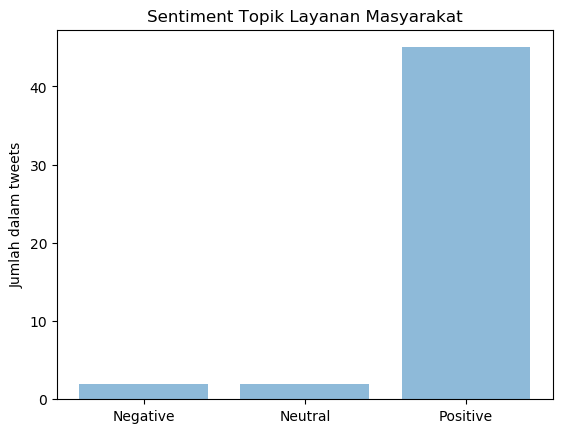

In [20]:
objects = ('Negative', 'Neutral', 'Positive')
y_pos = np.arange(len(objects))
performance = [layananneg, layananneu, layananpos]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah dalam tweets')
plt.title('Sentiment Topik Layanan Masyarakat')
 
plt.show()

Layanan Masyarakat


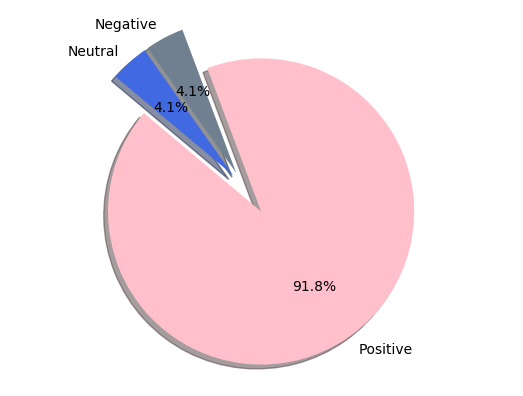

Komentar Masyarakat


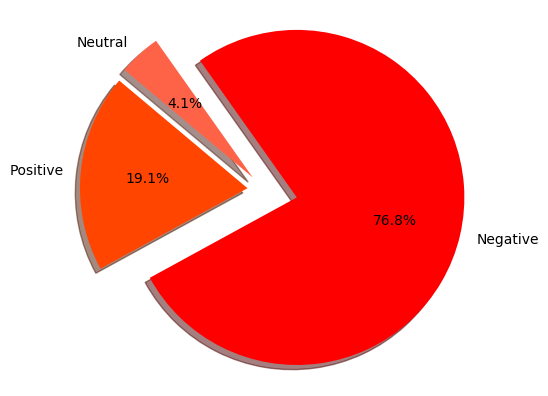

Kegiatan Polisi


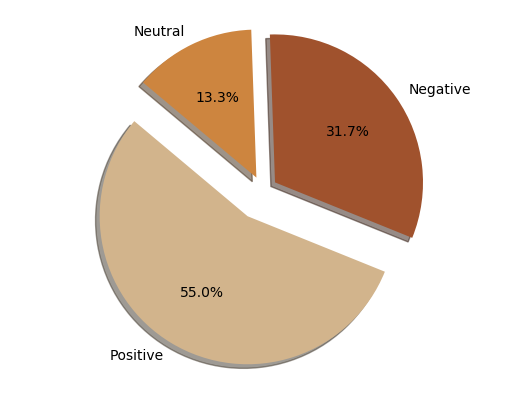

In [28]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Layanan Masyarakat')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [layananpos, layananneg, layananneu]
colors = ['pink', 'slategray', 'royalblue']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Data to plot
print('Komentar Masyarakat')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [komentarpos, komentarneg, komentarneu]
colors = ['orangered', 'red', 'tomato']
explode = (0.1, 0.2, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Data to plot
print('Kegiatan Polisi')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [giatpos, giatneg, giatneu]
colors = ['tan', 'sienna', 'peru']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Analisis Sentimen


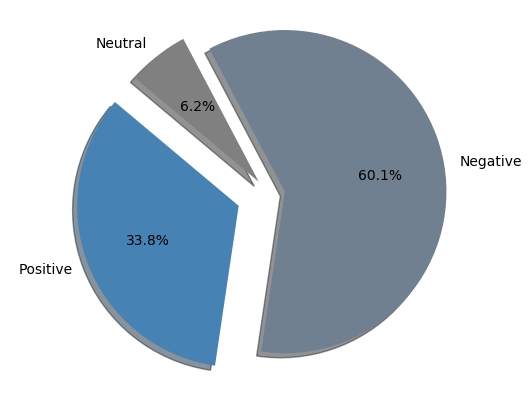

In [42]:
print('Analisis Sentimen')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['steelblue', 'slategray', 'gray']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Klasifikasi Topik


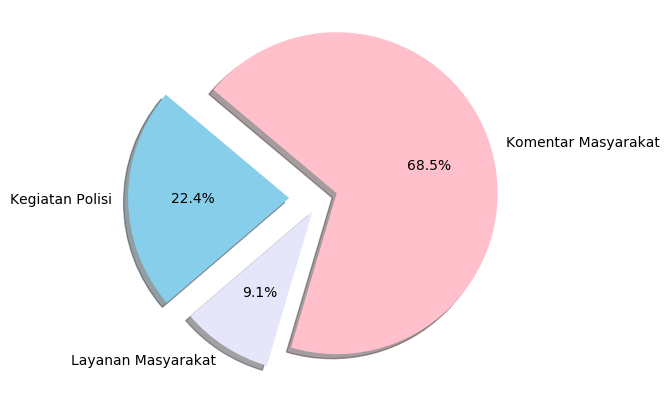

In [44]:
print('Klasifikasi Topik')
labels = 'Kegiatan Polisi', 'Layanan Masyarakat', 'Komentar Masyarakat'
sizes = [giat, layanan, komentar]
colors = ['skyblue', 'lavender', 'pink']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()